## Амири Зикрулло
### *Лабораторная 4.  Линейная регрессия*
#### Датасет про обучение студентов [в kaggle.com](https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Student_Performance.csv")
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [4]:
df.shape

(10000, 6)

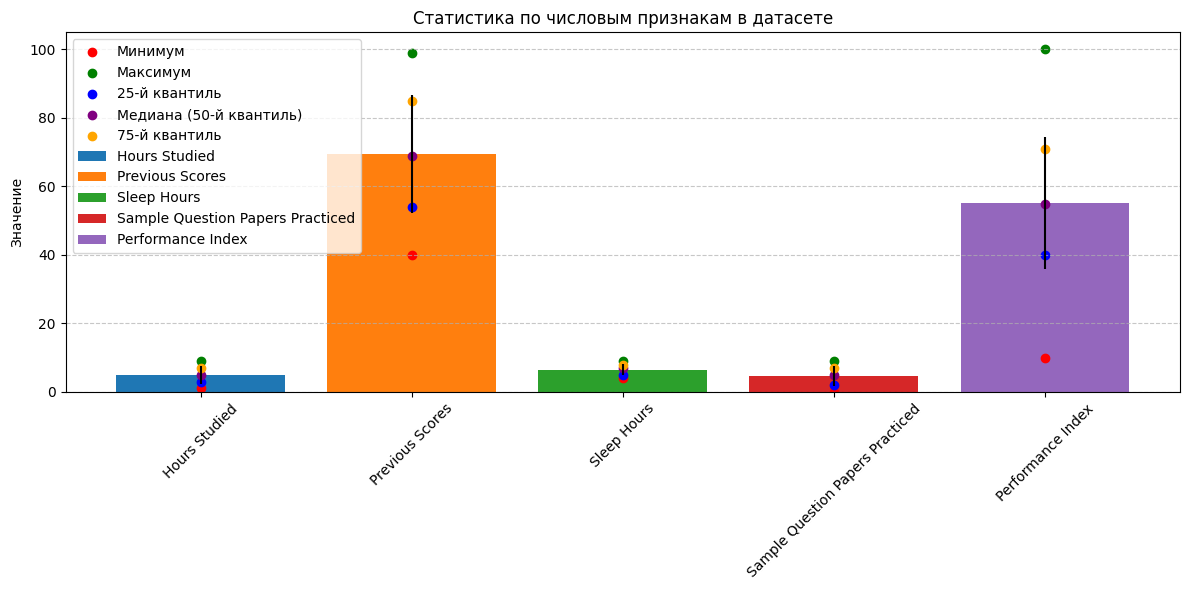

In [5]:
# Выбор только числовых столбцов
numeric_columns = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']

# Получение статистики
statistics = df[numeric_columns].describe()

# Создание графика
fig, ax = plt.subplots(figsize=(12, 6))

# Создаем планку для каждого числового признака
for col in statistics.columns:
    ax.bar(col, statistics.loc['mean', col], yerr=statistics.loc['std', col], label=col)

# Добавляем минимум и максимум
ax.scatter(statistics.columns, statistics.loc['min'], color='red', marker='o', label='Минимум')
ax.scatter(statistics.columns, statistics.loc['max'], color='green', marker='o', label='Максимум')

# Добавляем квантили
ax.scatter(statistics.columns, df[numeric_columns].quantile(0.25), color='blue', marker='o', label='25-й квантиль')
ax.scatter(statistics.columns, df[numeric_columns].quantile(0.5), color='purple', marker='o', label='Медиана (50-й квантиль)')
ax.scatter(statistics.columns, df[numeric_columns].quantile(0.75), color='orange', marker='o', label='75-й квантиль')

# Настройка графика
ax.set_title('Статистика по числовым признакам в датасете')
ax.set_ylabel('Значение')
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend()

# Вывод графика
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [6]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [7]:
df = pd.get_dummies(df, columns=['Extracurricular Activities'], drop_first=True)

In [8]:
# 3. Нормировка числовых признаков (стандартизация)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_columns = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [91]:
df

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_Yes
0,0.775188,1.704176,1.456205,-1.249754,1.862167,True
1,-0.383481,0.723913,-1.492294,-0.900982,0.508818,False
2,1.161410,-1.063626,0.276805,-0.900982,-0.532220,True
3,0.002742,-1.005963,-0.902594,-0.900982,-1.000687,True
4,0.775188,0.320275,0.866505,0.145333,0.560870,False
...,...,...,...,...,...,...
9995,-1.542149,-1.178951,-1.492294,-0.900982,-1.677362,True
9996,0.775188,-0.314013,0.866505,0.145333,0.144454,True
9997,0.388965,0.781575,0.866505,0.145333,0.977285,True
9998,1.547633,1.588851,0.276805,-1.598526,2.070374,True


In [9]:
from sklearn.model_selection import train_test_split

X = df[numeric_columns]  # Здесь используются только числовые признаки
y = df['Performance Index']  # Это целевая переменная

# Разделение данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# test_size=0.2 означает, что 20% данных будут использованы для тестирования, а остальные 80% - для обучения.
# random_state=42 позволяет зафиксировать случайное разделение для воспроизводимости результатов.


In [10]:
class CustomLinearRegression:
    def __init__(self):
        self.coefficients = None

    def fit(self, X, y):
        # Добавляем столбец с единицами в матрицу X (для свободного члена)
        ones = np.ones((X.shape[0], 1))
        X = np.hstack((ones, X))

        # Решение методом наименьших квадратов (аналитическое решение)
        XTX = np.dot(X.T, X)
        XTy = np.dot(X.T, y)
        self.coefficients = np.linalg.solve(XTX, XTy)

    def predict(self, X):
        ones = np.ones((X.shape[0], 1))
        X = np.hstack((ones, X))
        return np.dot(X, self.coefficients)


In [11]:
# Модель 1: Используем только признак "Hours Studied"
model1 = CustomLinearRegression()
X_train1 = X_train[['Hours Studied']]
model1.fit(X_train1, y_train)
y_pred1 = model1.predict(X_test[['Hours Studied']])

# Модель 2: Используем два признака "Hours Studied" и "Previous Scores"
model2 = CustomLinearRegression()
X_train2 = X_train[['Hours Studied', 'Previous Scores']]
model2.fit(X_train2, y_train)
y_pred2 = model2.predict(X_test[['Hours Studied', 'Previous Scores']])

# Модель 3: Используем все числовые признаки
model3 = CustomLinearRegression()
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)


In [12]:
from sklearn.metrics import r2_score

# Оценка производительности модели 1
r2_model1 = r2_score(y_test, y_pred1)
print("R-squared (Модель 1):", r2_model1)

# Оценка производительности модели 2
r2_model2 = r2_score(y_test, y_pred2)
print("R-squared (Модель 2):", r2_model2)

# Оценка производительности модели 3
r2_model3 = r2_score(y_test, y_pred3)
print("R-squared (Модель 3):", r2_model3)


R-squared (Модель 1): 0.13160425385996777
R-squared (Модель 2): 0.985855014245765
R-squared (Модель 3): 1.0


In [16]:
correlation_matrix = X_train.corr()
print(correlation_matrix)


                                  Hours Studied  Previous Scores  Sleep Hours  \
Hours Studied                          1.000000        -0.010861     0.007221   
Previous Scores                       -0.010861         1.000000    -0.000245   
Sleep Hours                            0.007221        -0.000245     1.000000   
Sample Question Papers Practiced       0.014188         0.010707     0.000327   
Performance Index                      0.376255         0.914718     0.044435   

                                  Sample Question Papers Practiced  \
Hours Studied                                             0.014188   
Previous Scores                                           0.010707   
Sleep Hours                                               0.000327   
Sample Question Papers Practiced                          1.000000   
Performance Index                                         0.043888   

                                  Performance Index  
Hours Studied                         

**Модель 1** хорошо предсказывает производительность студентов, учитывая только один признак, но **Модель 2** с двумя признаками работает лучше. **Модель 3**, демонстрирующая R-squared равный 1.0, может вызвать подозрение на переобучение, где модель слишком хорошо подстроена под обучающие данные, но может не обобщать на новые данные.
#### Вывод 
**Модель 2** с признаками "Hours Studied" и "Previous Scores" является наилучшим выбором, так как она показывает высокую предсказательную способность без излишней сложности и риска переобучения.